## Feature Engineering for Energy Consumption Forecasting

- In this notebook, I will create new features to enhance the predictive power of our energy consumption forecasting models.  
- Feature engineering involves transforming raw data into meaningful inputs that help machine learning algorithms capture patterns, trends, and seasonality.  
- I will extract time-based features, generate lagged variables, rolling statistics, and other relevant attributes to improve model accuracy and performance.

In [1]:
import pandas as pd

In [2]:
## accessing the data
df_cleaned = pd.read_parquet(r"C:\Users\himan\Desktop\Projects\Energy_Forecasting_System\data\processed-data\est_hourly_cleaned.parquet")

In [3]:
df_cleaned.head()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
Datetime,,,,,,,,,,,,
1998-04-01 02:00:00+00:00,12379.0,9631.0,1621.0,2533.0,7190.0,1364.0,1166.0,0.0,9198.0,30393.0,4374.0,21244.0
1998-04-01 04:00:00+00:00,12379.0,9631.0,1621.0,2533.0,7190.0,1364.0,1166.0,0.0,9198.0,30393.0,4374.0,20421.0
1998-04-01 05:00:00+00:00,12379.0,9631.0,1621.0,2533.0,7190.0,1364.0,1166.0,0.0,9198.0,30393.0,4374.0,20713.0
1998-04-01 06:00:00+00:00,12379.0,9631.0,1621.0,2533.0,7190.0,1364.0,1166.0,0.0,9198.0,30393.0,4374.0,22526.0
1998-04-01 07:00:00+00:00,12379.0,9631.0,1621.0,2533.0,7190.0,1364.0,1166.0,0.0,9198.0,30393.0,4374.0,25772.0


In [4]:
df_cleaned.shape

(162081, 12)

In [5]:
df_cleaned.columns

Index(['AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 'EKPC', 'FE', 'NI',
       'PJME', 'PJMW', 'PJM_Load'],
      dtype='object')

##### Extracting time-based feature

In [6]:
## extracting time-based features
df_cleaned['hour'] = df_cleaned.index.hour
df_cleaned['day_of_week'] = df_cleaned.index.dayofweek
df_cleaned['month'] = df_cleaned.index.month
df_cleaned['day_of_year'] = df_cleaned.index.dayofyear
df_cleaned['is_weekend'] = (df_cleaned.index.dayofweek >= 5).astype(int)

In [7]:
assert isinstance(df_cleaned.index, pd.DatetimeIndex)

In [8]:
print(df_cleaned[['hour', 'day_of_week', 'month', 'day_of_year', 'is_weekend']].head())

                           hour  day_of_week  month  day_of_year  is_weekend
Datetime                                                                    
1998-04-01 02:00:00+00:00     2            2      4           91           0
1998-04-01 04:00:00+00:00     4            2      4           91           0
1998-04-01 05:00:00+00:00     5            2      4           91           0
1998-04-01 06:00:00+00:00     6            2      4           91           0
1998-04-01 07:00:00+00:00     7            2      4           91           0


##### Lag Feature  
A lag feature is a past value of a variable used as a predictor for future values.  
Think of it as teaching our model:  
“What happened 1 hour/day/week ago might help predict what happens now or next.”

In [9]:
core_cols = ['AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 
             'EKPC', 'FE', 'NI', 'PJME', 'PJMW', 'PJM_Load']

for col in core_cols:
    # Add lag features
    df_cleaned[f'{col}_lag_1'] = df_cleaned[col].shift(1)
    df_cleaned[f'{col}_lag_24'] = df_cleaned[col].shift(24)    
    # Add rolling features
    df_cleaned[f'{col}_rolling_mean_24'] = df_cleaned[col].rolling(window=24).mean()
    df_cleaned[f'{col}_rolling_std_24'] = df_cleaned[col].rolling(window=24).std()
    df_cleaned[f'{col}_rolling_mean_168'] = df_cleaned[col].rolling(168).mean() # Last 7 days
    df_cleaned[f'{col}_rolling_std_168'] = df_cleaned[col].rolling(168).std()

##### Holiday Indicators
This feature allows the model to distinguish between regular and holiday days, improving its ability to capture sudden shifts in demand and enhancing forecast accuracy.  

In [10]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar

calendar = USFederalHolidayCalendar()
holidays = calendar.holidays(start=df_cleaned.index.min(), end=df_cleaned.index.max())

df_cleaned['is_holiday'] = df_cleaned.index.isin(holidays).astype(int)

In [11]:
df_cleaned.columns

Index(['AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 'EKPC', 'FE', 'NI',
       'PJME', 'PJMW', 'PJM_Load', 'hour', 'day_of_week', 'month',
       'day_of_year', 'is_weekend', 'AEP_lag_1', 'AEP_lag_24',
       'AEP_rolling_mean_24', 'AEP_rolling_std_24', 'AEP_rolling_mean_168',
       'AEP_rolling_std_168', 'COMED_lag_1', 'COMED_lag_24',
       'COMED_rolling_mean_24', 'COMED_rolling_std_24',
       'COMED_rolling_mean_168', 'COMED_rolling_std_168', 'DAYTON_lag_1',
       'DAYTON_lag_24', 'DAYTON_rolling_mean_24', 'DAYTON_rolling_std_24',
       'DAYTON_rolling_mean_168', 'DAYTON_rolling_std_168', 'DEOK_lag_1',
       'DEOK_lag_24', 'DEOK_rolling_mean_24', 'DEOK_rolling_std_24',
       'DEOK_rolling_mean_168', 'DEOK_rolling_std_168', 'DOM_lag_1',
       'DOM_lag_24', 'DOM_rolling_mean_24', 'DOM_rolling_std_24',
       'DOM_rolling_mean_168', 'DOM_rolling_std_168', 'DUQ_lag_1',
       'DUQ_lag_24', 'DUQ_rolling_mean_24', 'DUQ_rolling_std_24',
       'DUQ_rolling_mean_168', 'DUQ_rollin

In [12]:
## checking for null values
print(df_cleaned.isnull().sum().sum())

4860


In [13]:
## dropping the null values
df_cleaned.dropna(inplace=True)

In [14]:
## checking for null values
print(df_cleaned.isnull().sum().sum())

0


In [15]:
print(df_cleaned['PJM_Load'].describe())

count    161914.000000
mean      34605.929098
std        2615.201334
min       17461.000000
25%       35082.000000
50%       35082.000000
75%       35082.000000
max       54030.000000
Name: PJM_Load, dtype: float64


Text(0.5, 1.0, 'Distribution of PJM_Load')

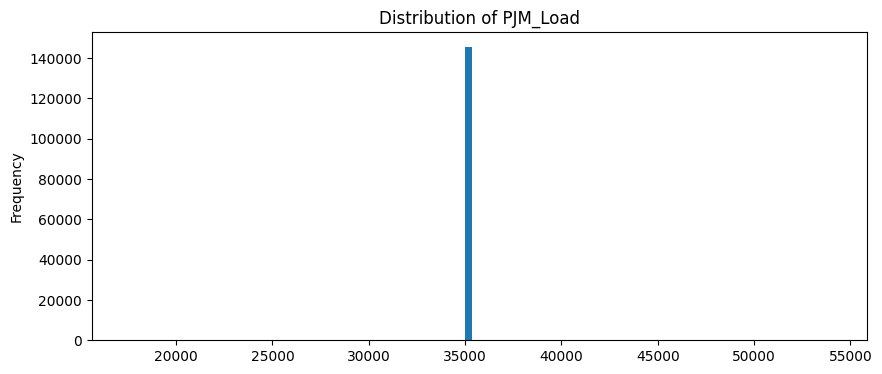

In [16]:
import matplotlib.pyplot as plt
df_cleaned['PJM_Load'].plot(kind='hist', bins=100, figsize=(10,4))
plt.title('Distribution of PJM_Load')

In [17]:
df_cleaned.corr()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,...,PJMW_rolling_std_24,PJMW_rolling_mean_168,PJMW_rolling_std_168,PJM_Load_lag_1,PJM_Load_lag_24,PJM_Load_rolling_mean_24,PJM_Load_rolling_std_24,PJM_Load_rolling_mean_168,PJM_Load_rolling_std_168,is_holiday
AEP,1.000000,0.467186,0.957041,0.388375,0.853634,0.889958,NaN,0.222781,0.621125,0.712200,...,0.346289,0.487357,0.361833,0.162846,0.163185,0.195949,-0.291055,0.217282,-0.293433,-0.011240
COMED,0.467186,1.000000,0.514492,0.832548,0.532633,0.551050,NaN,0.675118,-0.064352,0.398338,...,0.234435,0.249355,0.243883,0.087724,0.087906,0.105556,-0.156788,0.117048,-0.158069,-0.002884
DAYTON,0.957041,0.514492,1.000000,0.447521,0.830256,0.917116,NaN,0.274375,0.614664,0.735125,...,0.404846,0.427755,0.388789,0.149284,0.149594,0.179630,-0.266814,0.199186,-0.268994,-0.014386
DEOK,0.388375,0.832548,0.447521,1.000000,0.513112,0.457129,NaN,0.740525,-0.068235,0.311511,...,0.206876,0.237411,0.231389,0.093017,0.093210,0.111925,-0.166248,0.124110,-0.167607,-0.004303
DOM,0.853634,0.532633,0.830256,0.513112,1.000000,0.861213,NaN,0.443635,0.485980,0.674566,...,0.467352,0.427752,0.491181,0.185473,0.185858,0.223175,-0.331495,0.247472,-0.334204,-0.007438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PJM_Load_rolling_mean_24,0.195949,0.105556,0.179630,0.111925,0.223175,0.169960,NaN,0.170522,0.211037,0.052388,...,0.402079,0.337162,0.461591,0.829277,0.794769,1.000000,-0.496430,0.888123,-0.505841,-0.001980
PJM_Load_rolling_std_24,-0.291055,-0.156788,-0.266814,-0.166248,-0.331495,-0.252452,NaN,-0.253285,-0.313466,-0.077808,...,-0.597231,-0.500806,-0.685628,-0.420150,-0.420139,-0.496430,1.000000,-0.579341,0.977365,-0.000349
PJM_Load_rolling_mean_168,0.217282,0.117048,0.199186,0.124110,0.247472,0.188464,NaN,0.189086,0.234013,0.057666,...,0.445853,0.373868,0.511844,0.725279,0.753284,0.888123,-0.579341,1.000000,-0.564314,0.000109
PJM_Load_rolling_std_168,-0.293433,-0.158069,-0.268994,-0.167607,-0.334204,-0.254514,NaN,-0.255355,-0.316027,-0.077636,...,-0.602110,-0.504898,-0.691230,-0.422841,-0.419260,-0.505841,0.977365,-0.564314,1.000000,-0.000618


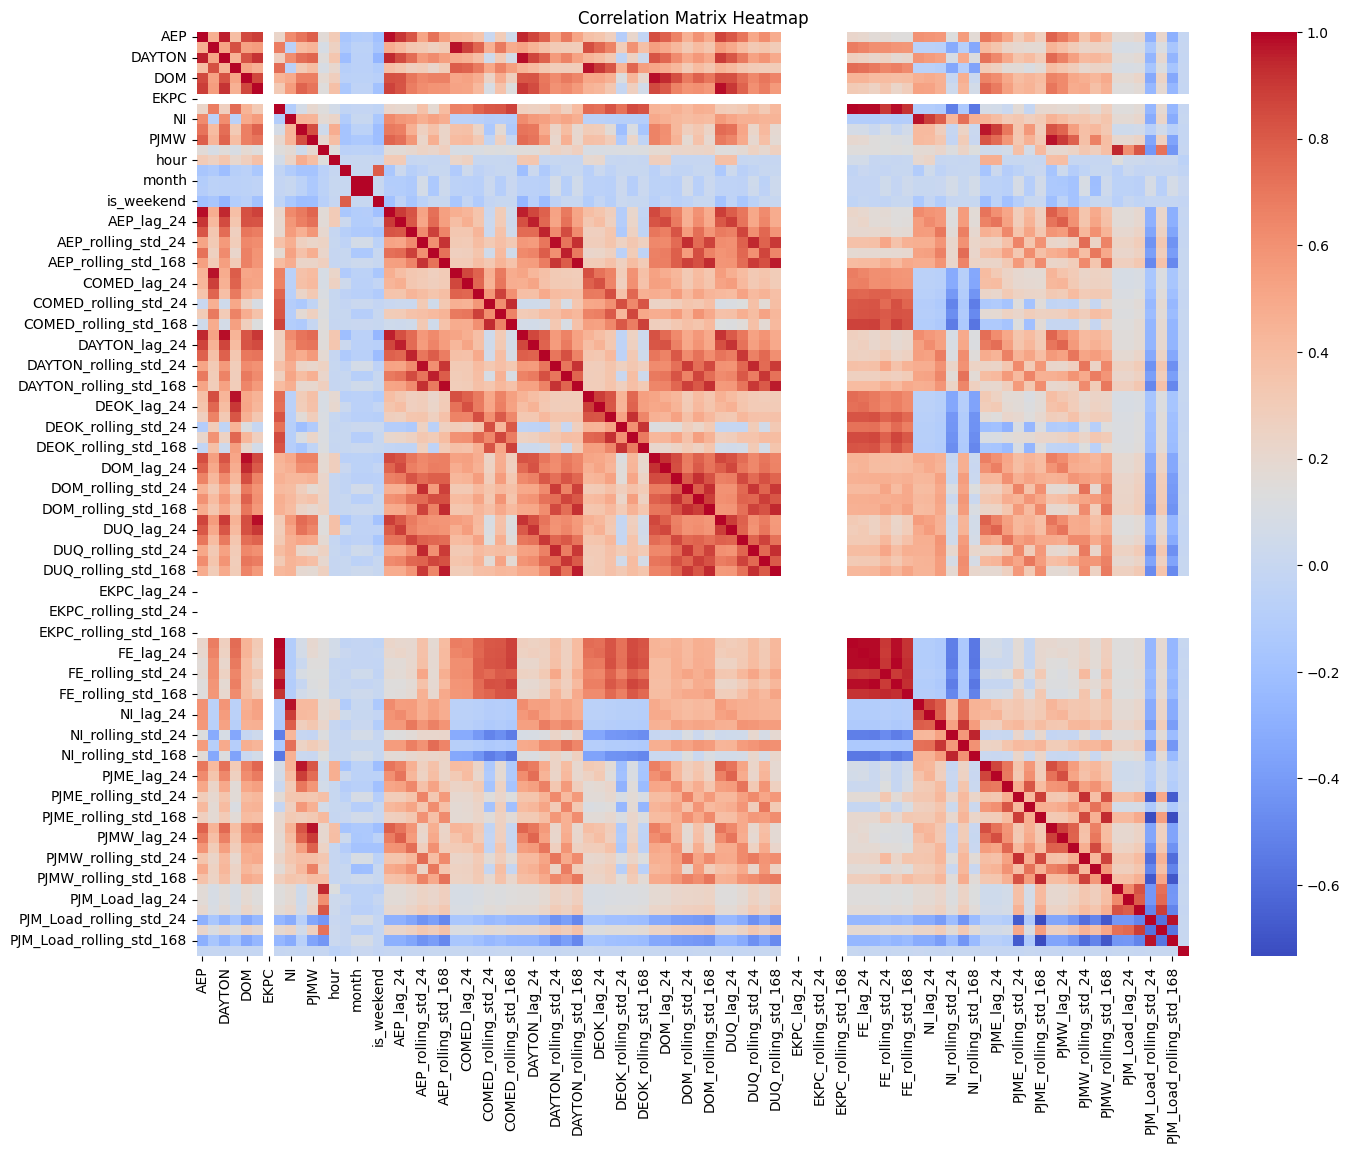

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
sns.heatmap(df_cleaned.corr(), cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [19]:
## saving the cleaned data with new features
df_cleaned.to_parquet(r"C:\Users\himan\Desktop\Projects\Energy_Forecasting_System\data\processed-data\est_hourly_cleaned_with_features.parquet")